In [47]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [48]:
# Create X and Y coordinates for ellipse
# TODO: Play around with these values to understand what each variable means
a, b = 10, 100

t = np.arange(0, 100, 0.01)

x = a*np.sin(t)
y = b*np.cos(t)

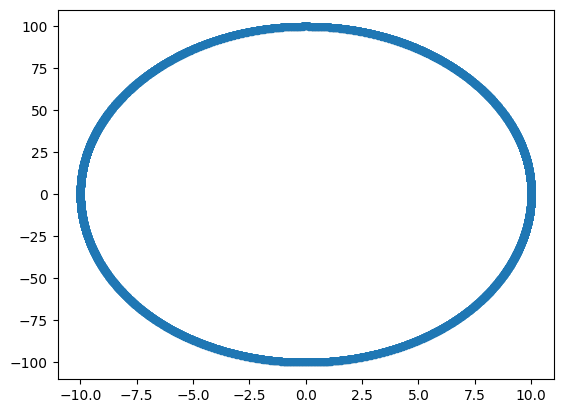

In [49]:
# Display the ellipse
plt.plot(x, y, '*-')
plt.show()

In [50]:
# Rotate the points of the ellipse
cc = np.cos(np.pi / 1)
ss = np.sin(np.pi / 2)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

rpts = np.dot(R, pts)

In [51]:
rpts.shape

(2, 10000)

In [52]:
# TODO: Compute the rotated angle in radians and degrees from rpts

U, S, Vt = svd(rpts.T)


major_axis = U[:, 0]
est_rot_angle = np.arctan2(major_axis[1], major_axis[0])

est_rot_angle_deg = np.degrees(est_rot_angle)

print(f"Estimated rotation angle (radians): {est_rot_angle}")
print(f"Estimated rotation angle (degrees): {est_rot_angle_deg}")




Estimated rotation angle (radians): -2.3562193583197586
Estimated rotation angle (degrees): -135.0014248387452


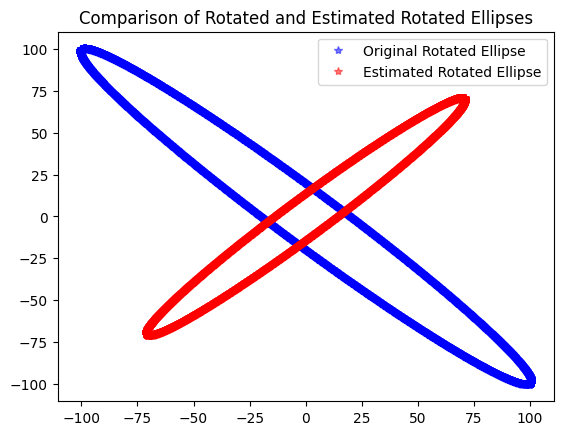

: 

In [53]:

# Rotate original points based on estimate
cc = np.cos(est_rot_angle)
ss = np.sin(est_rot_angle)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))
est_rpts = np.dot(R, pts)

# Display results
plt.plot(rpts[0, :], rpts[1, :], 'b*', alpha=0.5, label="Original Rotated Ellipse")
plt.plot(est_rpts[0, :], est_rpts[1, :], 'r*', alpha=0.5, label="Estimated Rotated Ellipse")
plt.legend()
plt.title("Comparison of Rotated and Estimated Rotated Ellipses")
plt.show()